## BANK_MARKETING_DEPOSIT_PREDICTION

We often got a call from bank regarding creditcards, loan, term plan, debit card, CC and many more offers. here we have data of Portuguese bank regarding their calls for term deposit. based on past 12000 calling data they collect some important parameter like age,work profession,balance,communication,duration of call,loan taken of not etc. Now our work is to study and analysis that data and based on it we need to build a predictive model which can predict that client will deposit term or not?. It will very useful for bank to findout their prime clients where they can get result if they do effort. so it will leads to higher success ratio in closing.

### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")


import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

### LOAD DATASET

In [2]:
df = pd.read_csv('bank_marketing.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
df.shape

(11162, 17)

In [5]:
df.isnull().sum()

#NO NUL VALUES IN DATASET

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
num = ['float64','int64']
my_df = df.select_dtypes(include=num)
my_df.sample(n=10)

,age,balance,day,duration,campaign,pdays,previous
8320,33,370,8,249,1,-1,0
5550,32,-184,6,129,2,197,1
4622,51,0,8,124,2,-1,0
5805,42,222,26,80,16,-1,0
6008,45,-497,20,260,1,-1,0
8971,38,3419,20,324,5,-1,0
2164,57,473,1,295,1,-1,0
8595,34,425,16,1389,7,-1,0
1619,39,732,23,522,4,-1,0
1002,36,1295,20,1192,1,-1,0


In [8]:
objt = ['object']
my_df1 = df.select_dtypes(include=objt)
my_df1.sample(n=10)

#OBJECT DTYPES COLUMNS

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
8127,technician,divorced,secondary,no,no,no,cellular,aug,unknown,no
3471,self-employed,married,tertiary,no,yes,no,telephone,apr,other,yes
4605,technician,married,secondary,no,yes,yes,unknown,may,unknown,yes
7336,admin.,divorced,secondary,no,yes,yes,cellular,jul,unknown,no
484,technician,married,secondary,no,yes,no,cellular,jul,unknown,yes
7555,services,single,secondary,no,yes,no,cellular,jul,unknown,no
7969,entrepreneur,married,tertiary,no,no,no,cellular,nov,unknown,no
8952,technician,married,secondary,no,yes,no,cellular,aug,unknown,no
8998,housemaid,divorced,tertiary,no,yes,no,cellular,aug,unknown,no
8597,entrepreneur,divorced,primary,no,no,no,cellular,jan,failure,no


In [9]:
categorical_df=[j for j in df if df[j].dtype == 'object']
for i in categorical_df:
    columns = df[i].unique()
    print(i,columns)
    
#ALL UNIQUE VALUES IN CATAGORICAL DATA

job ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital ['married' 'single' 'divorced']
education ['secondary' 'tertiary' 'primary' 'unknown']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'other' 'failure' 'success']
deposit ['yes' 'no']


In [10]:
df.head()

#OUR DATA IS NOW LOOK GOOD WITH CATAGORIES CONVERTATION

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


job
admin.           1334
blue-collar      1944
entrepreneur      328
housemaid         274
management       2566
retired           778
self-employed     405
services          923
student           360
technician       1823
unemployed        357
unknown            70
dtype: int64


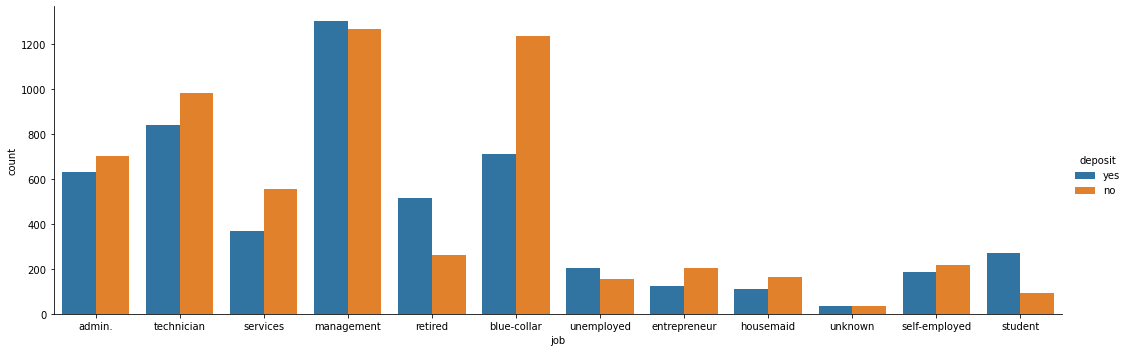

In [11]:
unknown_job = df.groupby(['job']).apply(lambda df: round(df['job'].count(), 0))
print(unknown_job)

sns.catplot(x ='job', hue ='deposit',
kind ='count', data = df,height = 5,aspect = 3)

CONCLUSION:
    
    We can see that management employee are forward in deposit and if we see with ratio than student are forward.
    
    blue collar job person are very low in deposit.
    

marital
divorced    1293
married     6351
single      3518
dtype: int64


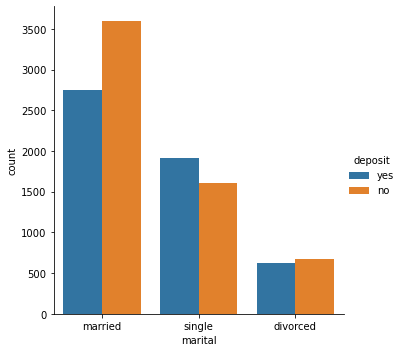

In [12]:
unknown_marital = df.groupby(['marital']).apply(lambda df: round(df['marital'].count(), 0))
print(unknown_marital)

sns.catplot(x ='marital', hue ='deposit',
kind ='count', data = df)

conclusion:

married person are forward in deposit but in view of ratio, single person are leading in deposit.

education
primary      1500
secondary    5476
tertiary     3689
unknown       497
dtype: int64


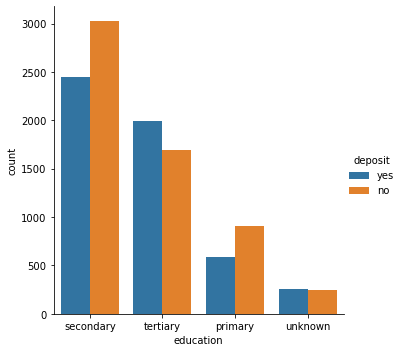

In [13]:
unknown_education = df.groupby(['education']).apply(lambda df: round(df['education'].count(), 0))
print(unknown_education)
sns.catplot(x ='education', hue ='deposit',
kind ='count', data = df)

conclusion:
    
    tertiary educated person are leader in deposit but person who with low eduction like primary only are not intrested in deposit.

housing
no     5881
yes    5281
dtype: int64


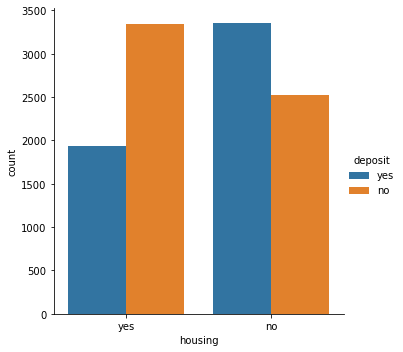

In [14]:
unknown_housing = df.groupby(['housing']).apply(lambda df: round(df['housing'].count(), 0))
print(unknown_housing)
sns.catplot(x ='housing', hue ='deposit',
kind ='count', data = df)

conclusion:
    
    clearly visulise that people who have continue housing loan are not intrested in deposit and people we didn't have
    housing loan are intrested in deposit.

loan
no     9702
yes    1460
dtype: int64


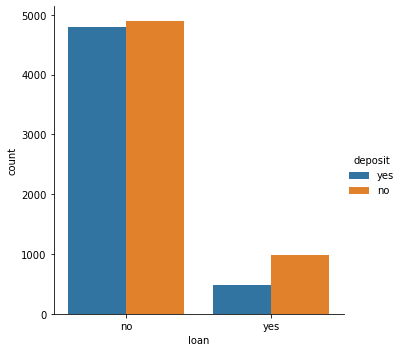

In [15]:
unknown_loan = df.groupby(['loan']).apply(lambda df: round(df['loan'].count(), 0))
print(unknown_loan)
sns.catplot(x ='loan', hue ='deposit',
kind ='count', data = df)

contact
cellular     8042
telephone     774
unknown      2346
dtype: int64


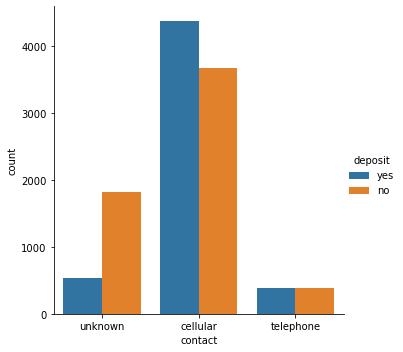

In [16]:
unknown_contact = df.groupby(['contact']).apply(lambda df: round(df['contact'].count(), 0))
print(unknown_contact)

sns.catplot(x ='contact', hue ='deposit',
kind ='count', data = df)

Conclusion:

contacted over cellular are highly intrested in deposit.

month
apr     923
aug    1519
dec     110
feb     776
jan     344
jul    1514
jun    1222
mar     276
may    2824
nov     943
oct     392
sep     319
dtype: int64


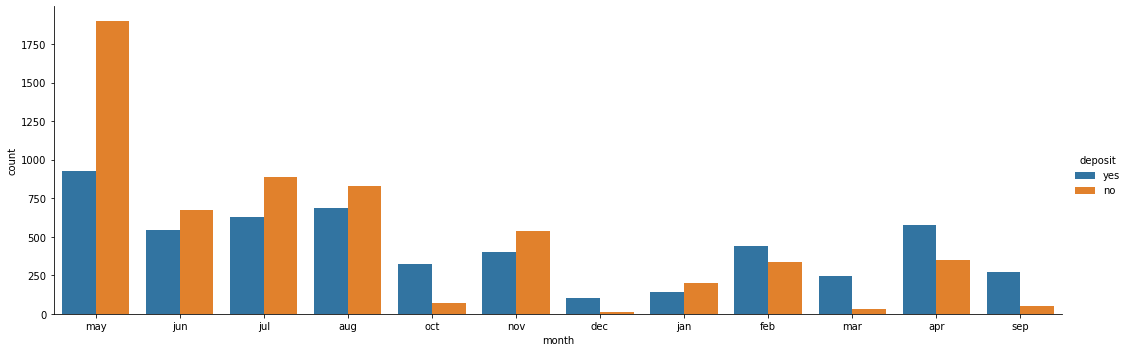

In [17]:
unknown_month = df.groupby(['month']).apply(lambda df: round(df['month'].count(), 0))
print(unknown_month)

sns.catplot(x ='month', hue ='deposit',
kind ='count', data = df,height = 5,aspect = 3)

conclusion:

in month of Feb,mar and april ratio of closing is higher compare to other months.

poutcome
failure    1228
other       537
success    1071
unknown    8326
dtype: int64


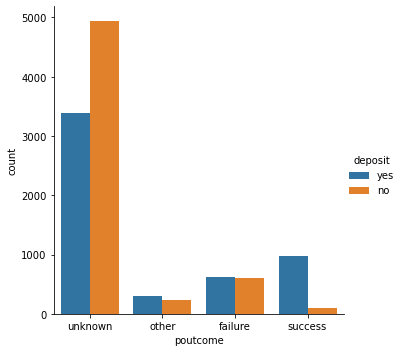

In [18]:
unknown_poutcome = df.groupby(['poutcome']).apply(lambda df: round(df['poutcome'].count(), 0))
print(unknown_poutcome)

sns.catplot(x ='poutcome', hue ='deposit',
kind ='count', data = df)

conclusion:

as per common view, in success call ratio of deposit closure is very high 

In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


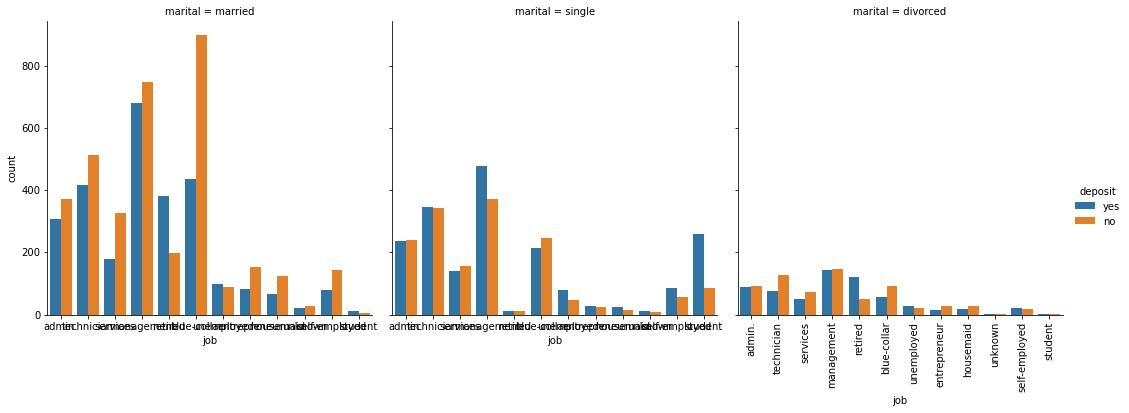

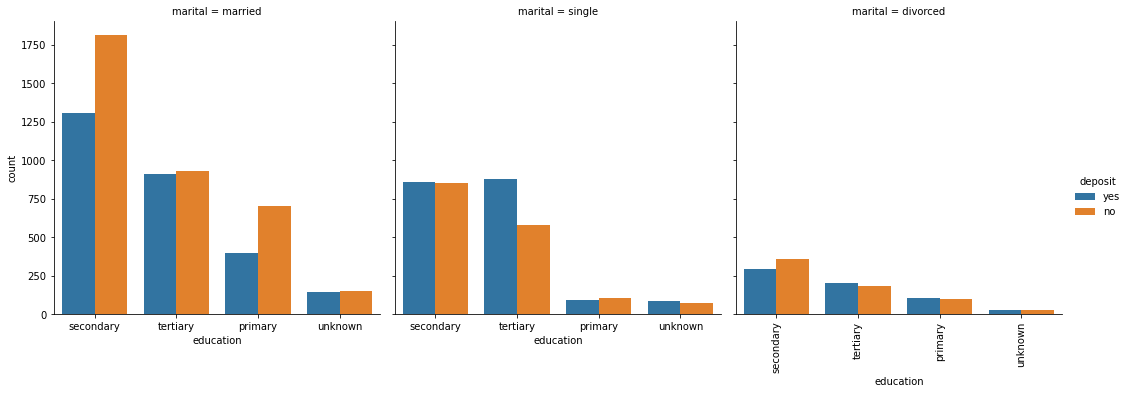

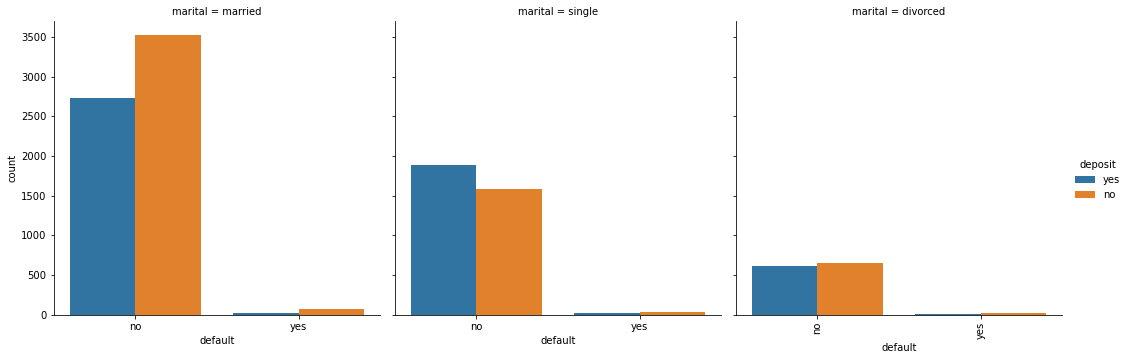

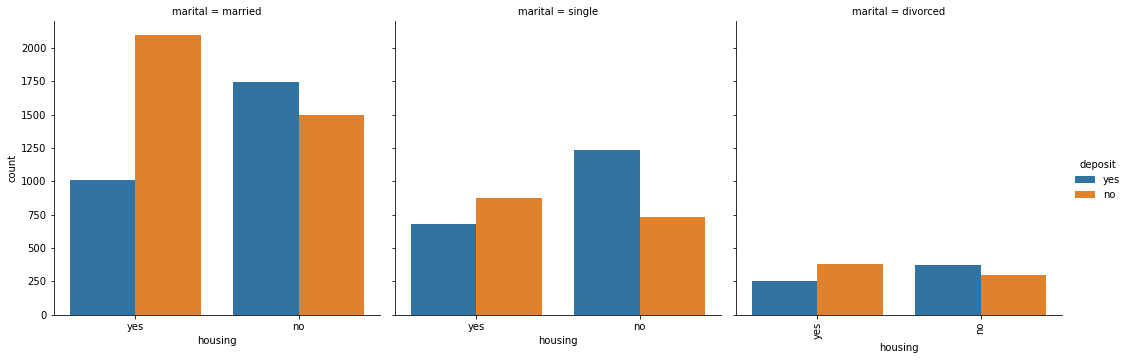

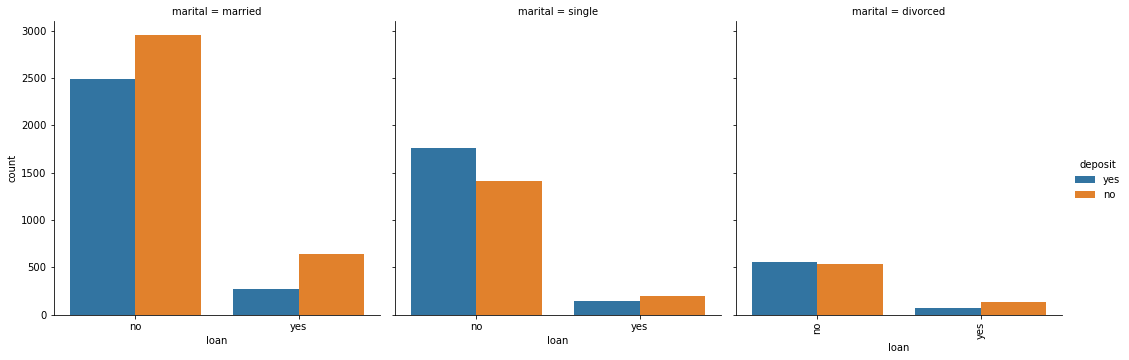

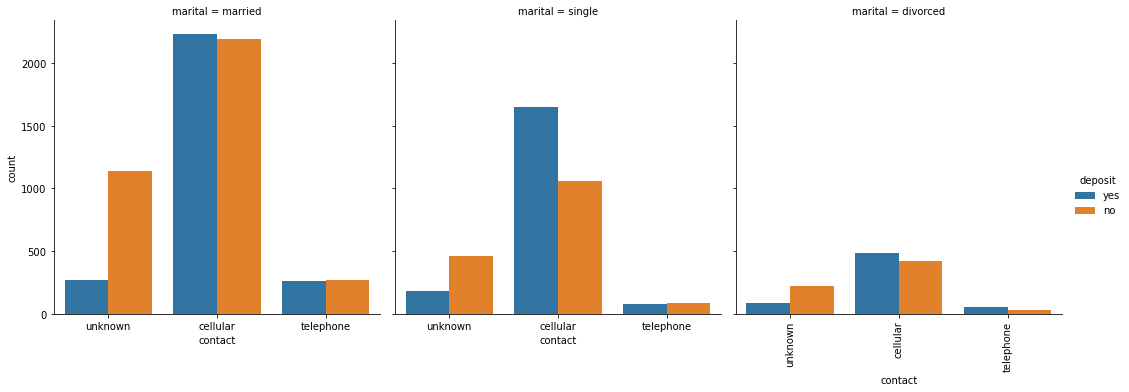

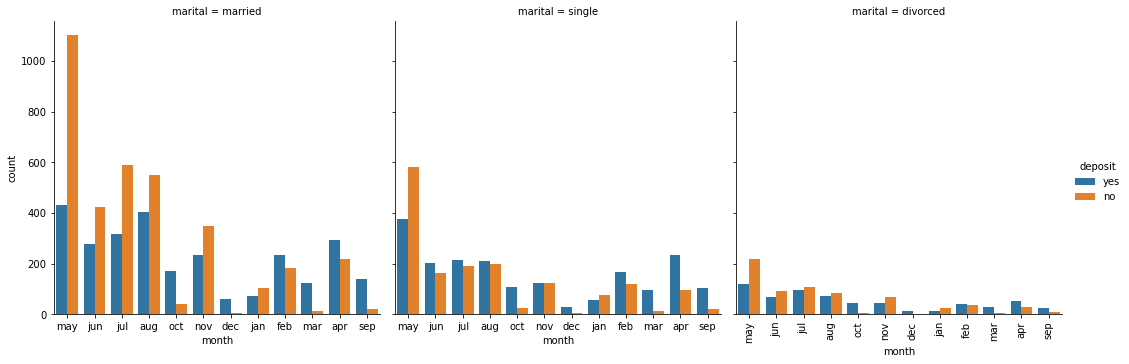

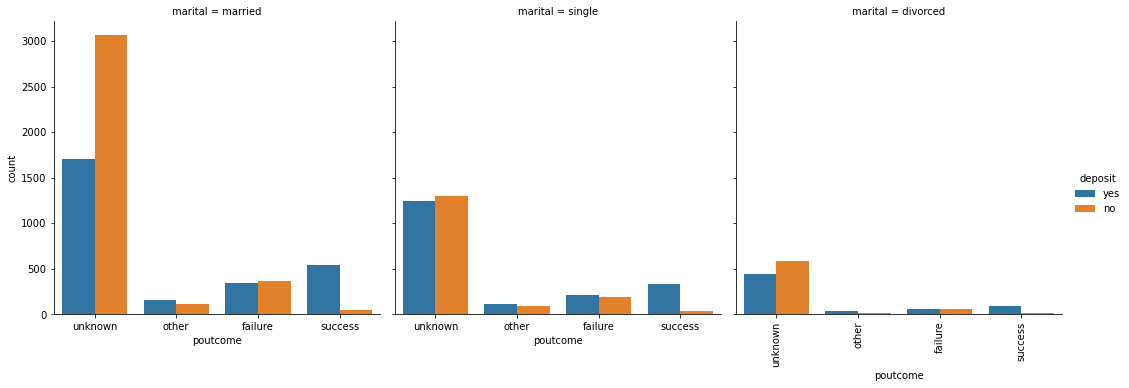

In [20]:
i = ['job','education','default','housing','loan','contact','month','poutcome']

for a in i:
    sns.catplot(x =a, hue ='deposit', kind ='count', col ='marital', data = df)
    plt.xticks(rotation=90)

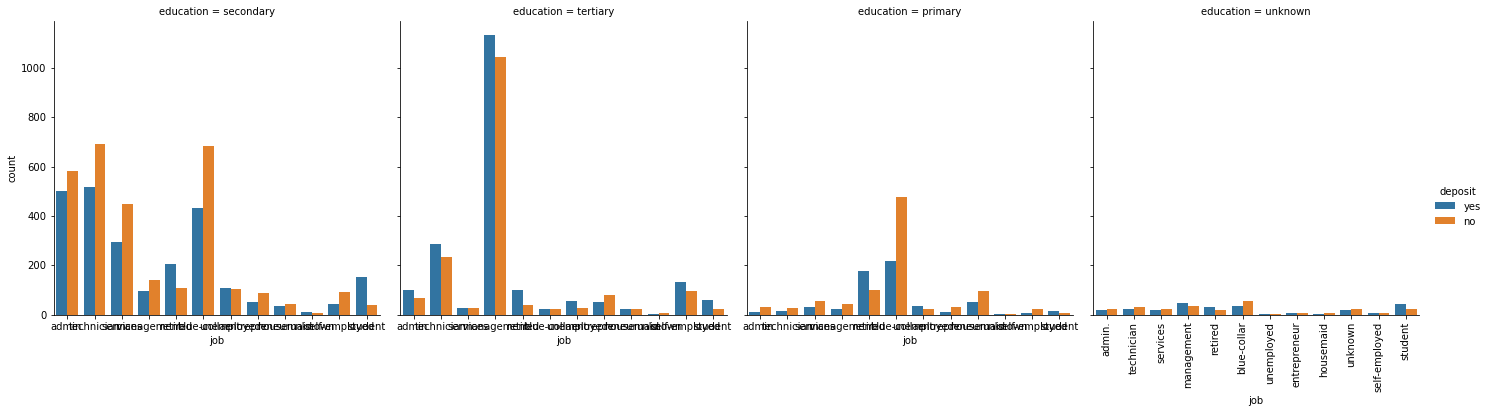

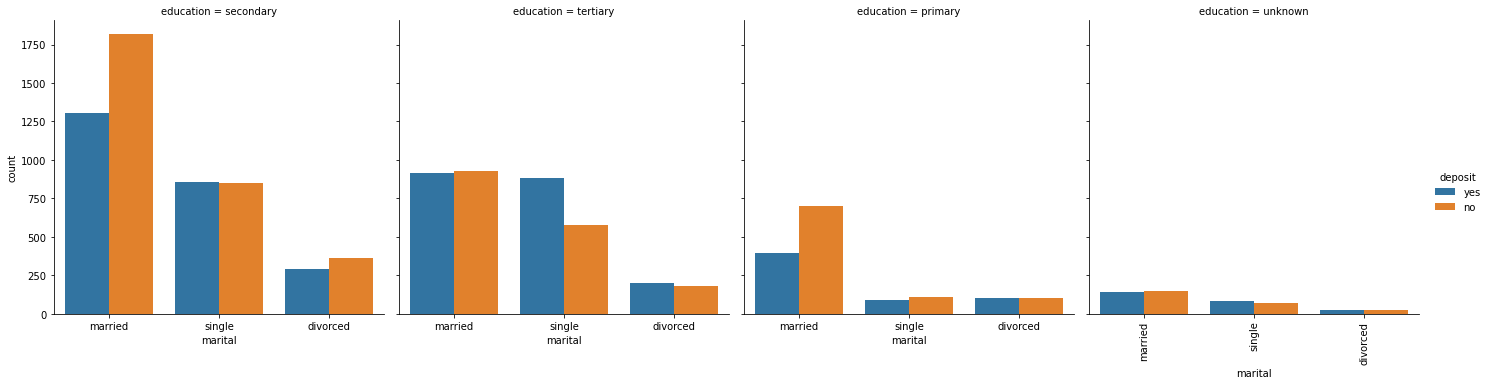

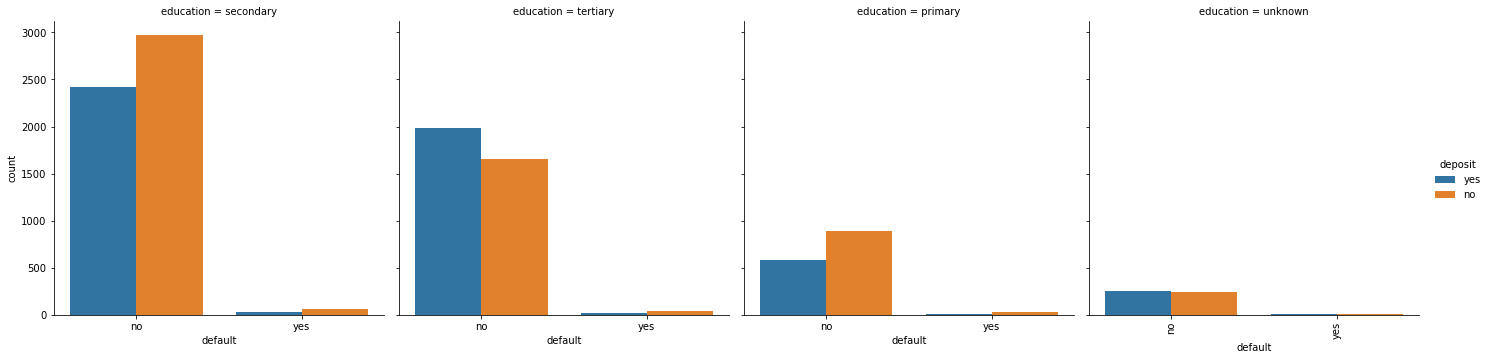

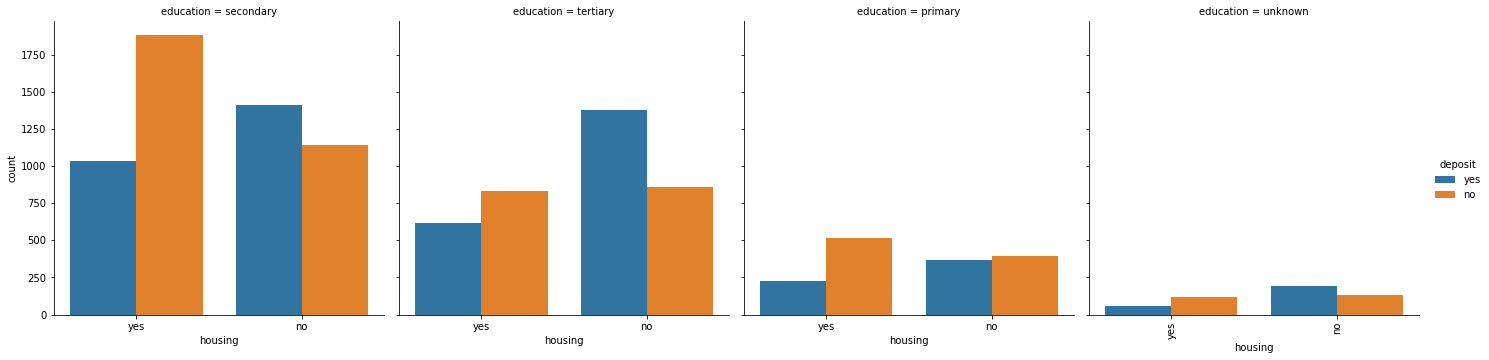

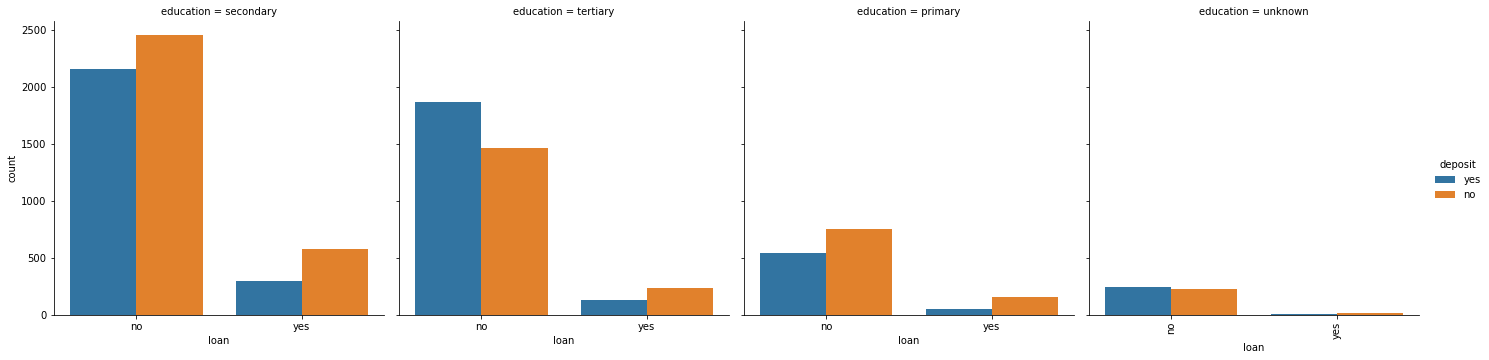

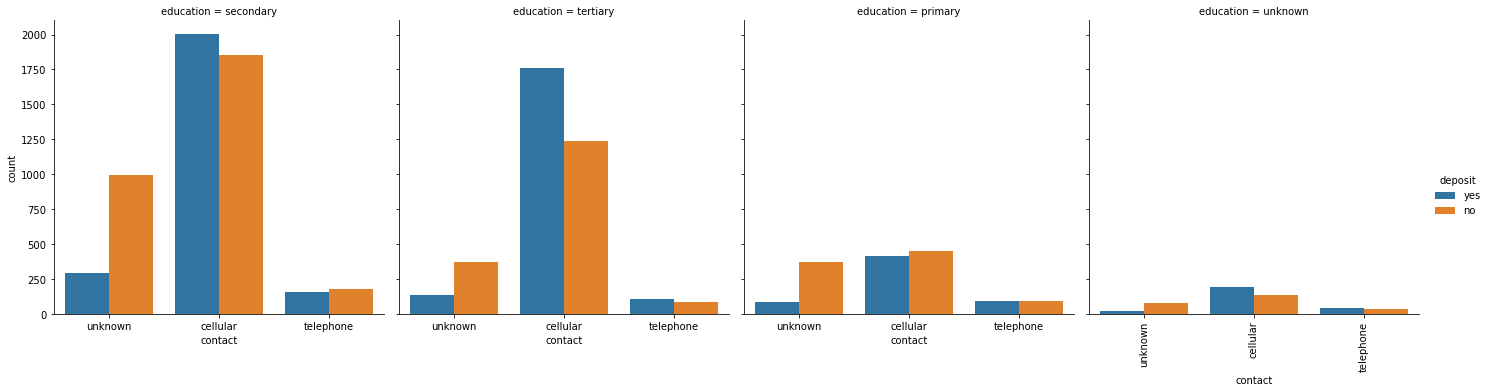

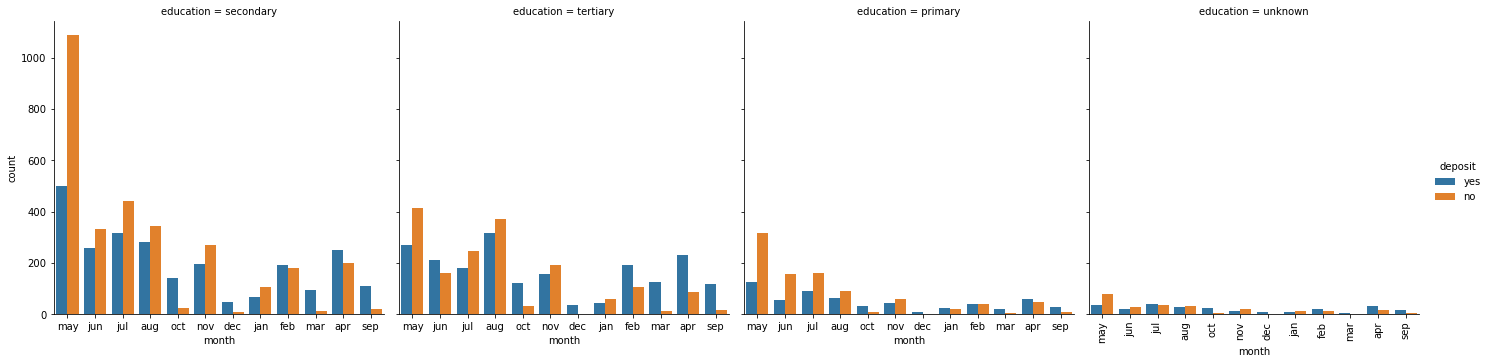

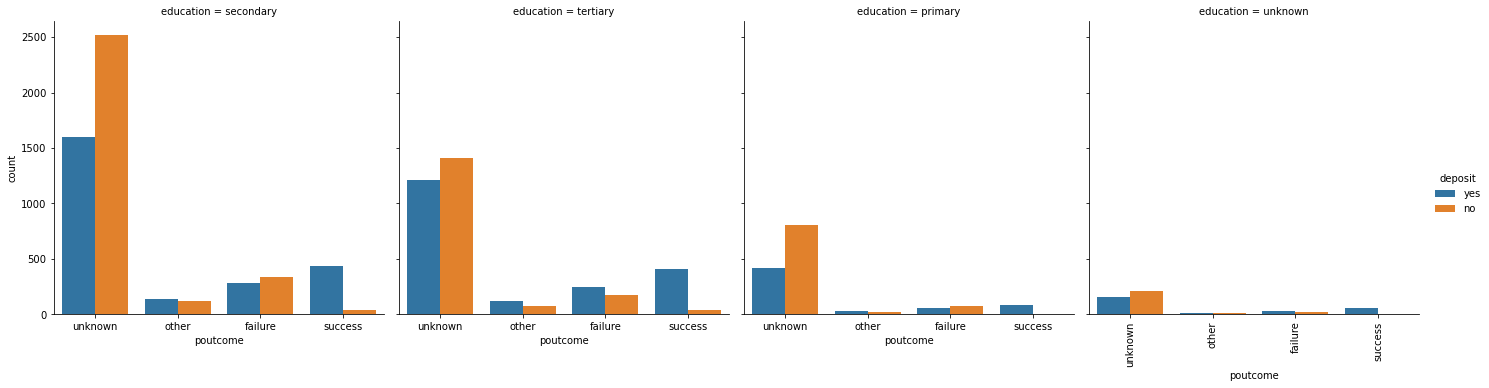

In [21]:
i = ['job','marital','default','housing','loan','contact','month','poutcome']

for a in i:
    sns.catplot(x =a, hue ='deposit', kind ='count', col ='education', data = df)
    plt.xticks(rotation=90)

In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


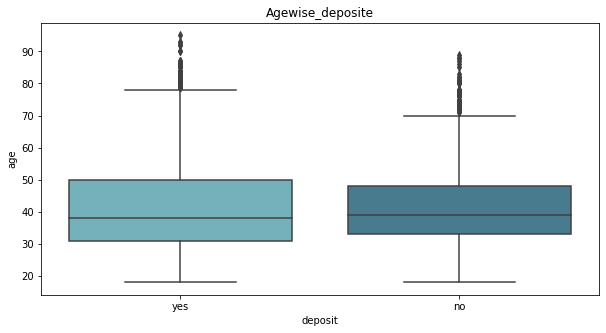

In [23]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'deposit', y = 'age', data = df, palette= 'GnBu_d').set_title('Agewise_deposite')
plt.show()

CONCLUSION:
    
    Age is not looking much effective as in both case avg age is nearly same.

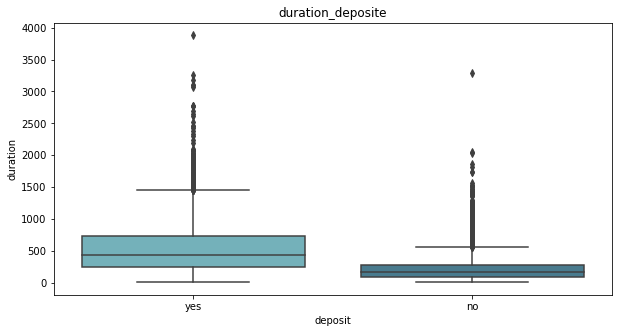

In [24]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'deposit', y = 'duration', data = df, palette= 'GnBu_d').set_title('duration_deposite')
plt.show()

conclusion:
    
    Duration of call is higher in closed success case it means if client is talking longer with you than it is higher 
    chances that he will go for deposit.
    

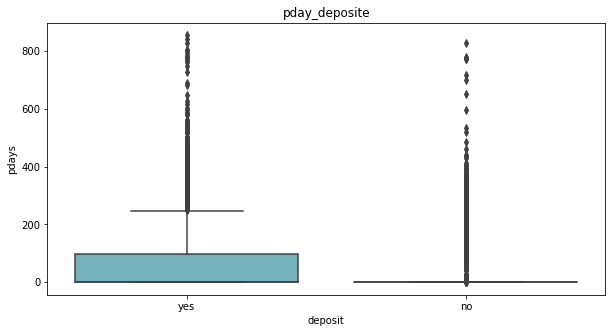

In [25]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'deposit', y = 'pdays', data = df, palette= 'GnBu_d').set_title('pday_deposite')
plt.show()

conclusion:

as followup and communication with client is strong than it leads to high chances of closing

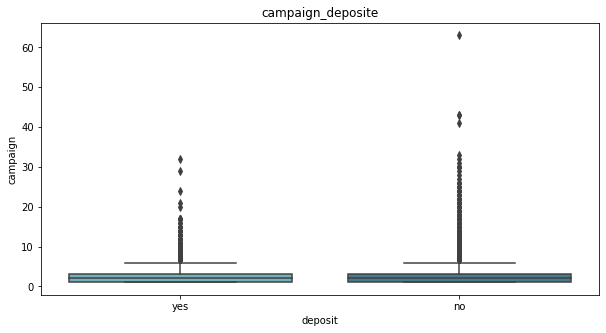

In [26]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'deposit', y = 'campaign', data = df, palette= 'GnBu_d').set_title('campaign_deposite')
plt.show()

conclusion:
    
    campaign is not looking much effective as in both case avg is same.

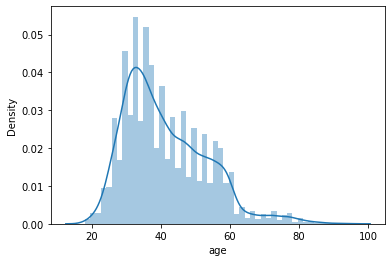

In [27]:
sns.distplot(df['age'])

In [28]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


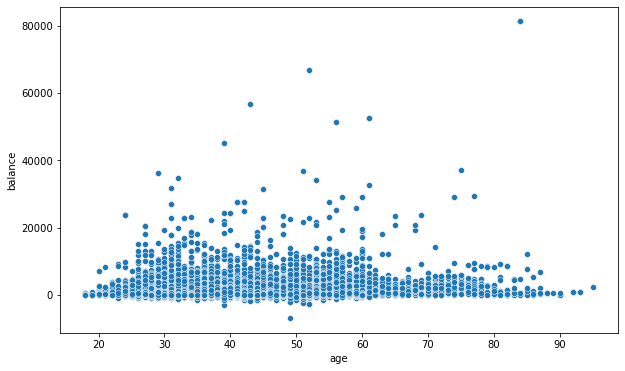

In [29]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='balance',data=df)

conclusion:
    
    bank balance is not looking much effective but here we can mark that age between 30 to 60 have higher balance becuase of
    their work productivity.

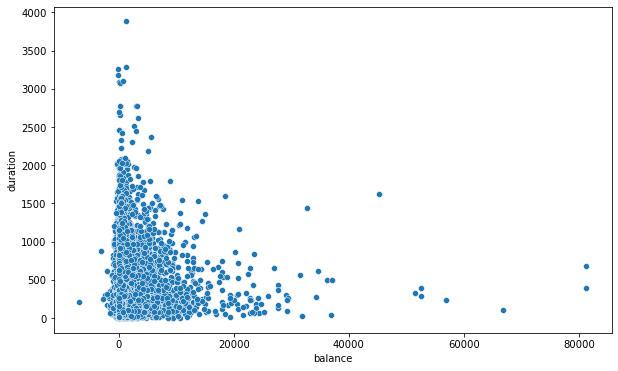

In [30]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='balance',y='duration',data=df)

In [31]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [32]:
objList = df.select_dtypes(include = "object").columns
print (objList)

#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int32
 2   marital    11162 non-null  int32
 3   education  11162 non-null  int32
 4   default    11162 non-null  int32
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int32
 7   loan       11162 non-null  int32
 8   contact    11162 non-null  int32
 9   day        11162 non-null  int64
 10  month      11162 non-null  int32
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int32
 16  deposit    11162 non-null  int32
dtypes: int32(10), int64(7)


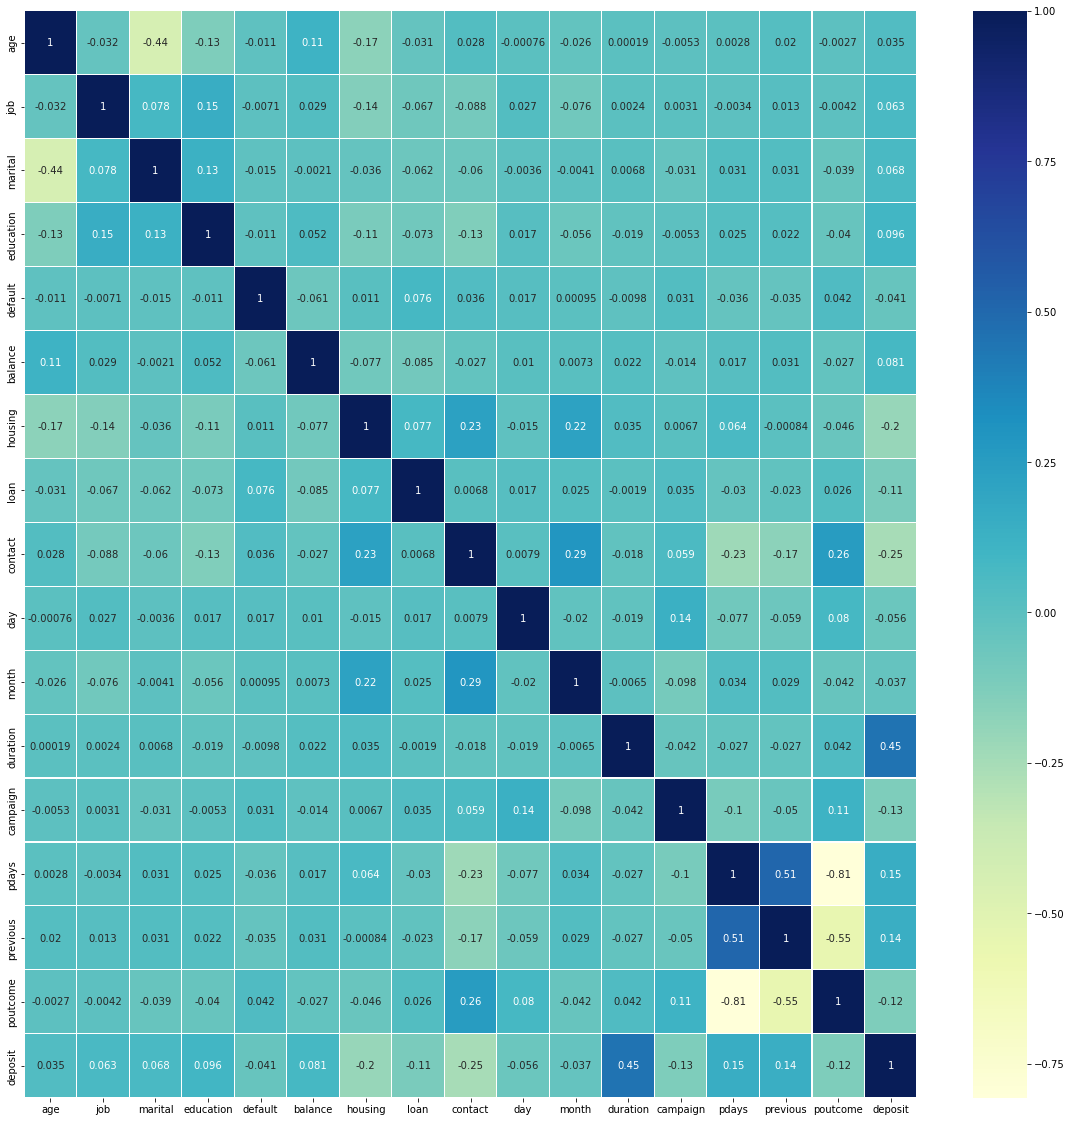

In [33]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="YlGnBu", linewidths=0.1, annot_kws={"fontsize":10});

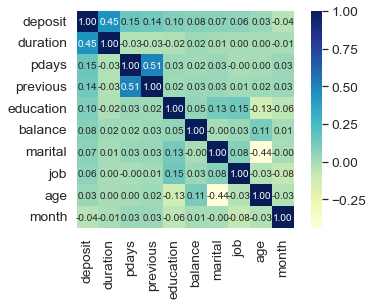

In [34]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'deposit')['deposit'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

CONCLUSION:
    
    column previous and duration higher corelation with target variable.

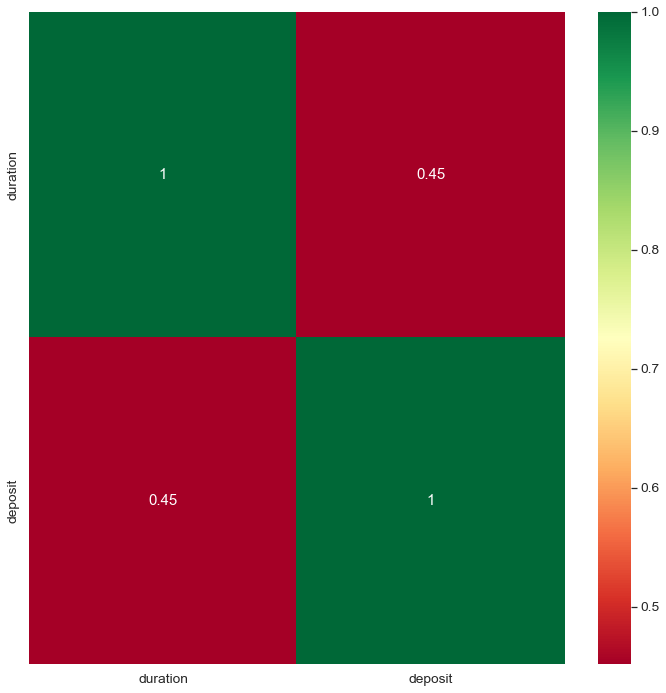

In [35]:
plt.figure(figsize=(12,12))
top_corr_features = corrmat.index[abs(corrmat["deposit"])>0.25]
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

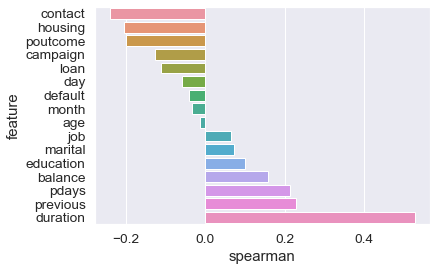

In [36]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['deposit'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

features = corrmat[['deposit']].sort_values(['deposit'], ascending=False)
features = [f for f in features.index if f != 'deposit']

spearman(df, features)

Conclusion:
    
    1)As duration is high then higher chances to deposit.
    2)previous communication is near than it have higher chances.
    3)if balance is high than chances of deposit is higher.
    4)tertiary educated person are leader in deposit but person who with low eduction like primary only are not intrested in deposit.
    5)We can see that management employee are forward in deposit and if we see with ratio than student are forward.
    6)blue collar job person are very low in deposit.
    7)married person are forward in deposit but in view of ratio, single person are leading in deposit.

In [37]:
df = df.drop(['age','month','default'], axis = 1)

#drop age month and default as it not looking much effective in terms to relation with target.

In [38]:
df.columns

Index(['job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'deposit'],
      dtype='object')

In [39]:
df.skew()

job          0.184306
marital     -0.173968
education    0.115543
balance      8.224619
housing      0.107678
loan         2.190201
contact      1.182309
day          0.111330
duration     2.143695
campaign     5.545578
pdays        2.449986
previous     7.335298
poutcome    -1.718276
deposit      0.104798
dtype: float64

In [40]:
from scipy.stats import boxcox

for col in df:
    if df[col].skew()>=2:
        df[col]=np.cbrt(df[col]) 
    if df[col].skew()<= -1.7:
        df[col]=np.power(df[col],2)

# here, we use cuberoot and power trans to remove skewness

In [41]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df=df.loc[(z_score<3).all(axis=1)]
print(df.shape)

#here, we can see that no of outliers removed are nearly 300  which can be acceptable.

(11162, 14)
(10836, 14)


In [42]:
df

,job,marital,education,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,deposit
0,0,1,1,13.281815,1,0.0,2,5,10.138084,1.000000,-1.000000,0.000000,9,1
1,0,1,1,3.556893,0,0.0,2,5,11.362573,1.000000,-1.000000,0.000000,9,1
2,9,1,1,10.829321,1,0.0,2,5,11.157513,1.000000,-1.000000,0.000000,9,1
3,7,1,1,13.528518,1,0.0,2,5,8.334755,1.000000,-1.000000,0.000000,9,1
4,0,1,2,5.687734,0,0.0,2,5,8.763381,1.259921,-1.000000,0.000000,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,2,0,1.000000,1,0.0,0,20,6.357861,1.000000,-1.000000,0.000000,9,0
11158,7,1,1,9.016431,0,0.0,2,16,4.362071,1.587401,-1.000000,0.000000,9,0
11159,9,2,1,3.072317,0,0.0,0,19,5.383213,1.259921,-1.000000,0.000000,9,0
11160,9,1,1,0.000000,0,1.0,0,8,2.080084,1.259921,5.561298,1.709976,0,0


### IMBALANCED DATASET

In [54]:
count0, count1 = df['deposit'].value_counts()

# Separate class
class_0 = df[df['deposit'] == 0]
class_1 = df[df['deposit'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (5672, 14)
class 1: (5164, 14)


total class of 1 and 0: 1    5672
0    5672
Name: deposit, dtype: int64


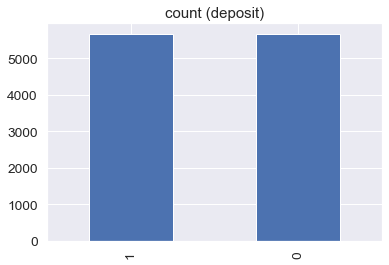

In [55]:
oversampling = class_1.sample(count0, replace=True)

df = pd.concat([oversampling, class_0], axis=0)

print("total class of 1 and 0:",df['deposit'].value_counts())# plot the count after under-sampeling
df['deposit'].value_counts().plot(kind='bar', title='count (deposit)')

In [56]:
df

,job,marital,education,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,deposit
477,0,2,1,-3.301927,0,0.0,0,16,8.247474,2.080084,-1.000000,0.000000,9,1
5059,0,1,1,11.705810,0,1.0,0,7,8.549880,1.000000,-1.000000,0.000000,9,1
622,10,2,0,-1.587401,0,1.0,0,30,9.236528,1.259921,-1.000000,0.000000,9,1
2348,8,2,3,7.752861,0,0.0,0,30,7.224045,1.000000,-1.000000,0.000000,9,1
2580,8,2,1,5.241483,0,0.0,0,21,4.876999,1.000000,-1.000000,0.000000,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,2,0,1.000000,1,0.0,0,20,6.357861,1.000000,-1.000000,0.000000,9,0
11158,7,1,1,9.016431,0,0.0,2,16,4.362071,1.587401,-1.000000,0.000000,9,0
11159,9,2,1,3.072317,0,0.0,0,19,5.383213,1.259921,-1.000000,0.000000,9,0
11160,9,1,1,0.000000,0,1.0,0,8,2.080084,1.259921,5.561298,1.709976,0,0


In [57]:
x =df.drop('deposit',axis=1)
y =df['deposit']

Scale down dataset

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [59]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.7)

feature selection

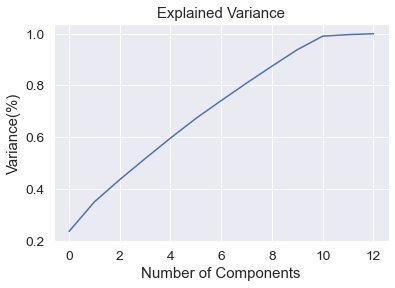

In [60]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

In [61]:
pca = PCA(n_components = 10)
new_data = pca.fit_transform(x_scaled)
pri_x = pd.DataFrame(new_data)
pri_x

,0,1,2,3,4,5,6,7,8,9
0,-1.236633,-0.074482,1.593687,0.610103,0.742163,1.281778,-0.337577,2.982303,-0.954673,-1.404356
1,-0.816563,0.607648,-0.942309,2.103403,1.644584,-0.318208,-1.364685,0.107461,0.426158,1.695794
2,-1.186761,-0.214290,1.764796,2.635309,0.821240,1.353312,-0.148080,-1.725130,-2.534586,0.398648
3,-0.427041,-2.852167,0.738898,0.734146,-1.111370,0.670463,-0.752561,-1.185671,0.861709,-0.656777
4,-0.623889,-1.420788,0.284171,0.614917,-0.806001,-0.769134,-0.589227,-0.768999,-1.379714,-0.695837
...,...,...,...,...,...,...,...,...,...,...
11339,-0.988280,1.203174,-0.436533,0.470850,-0.632864,0.510073,-1.541865,-0.031954,-1.442204,-1.254962
11340,-1.436335,-0.292219,0.779600,-1.365877,-0.347473,-1.110015,0.984208,0.187886,-0.702838,0.302534
11341,-0.729386,-1.454394,0.703984,0.698302,-0.629670,-0.448105,0.119284,-0.191324,-1.564288,-0.739050
11342,3.300412,1.244547,2.072208,2.002129,-0.254279,-2.480106,1.127457,-0.393367,-0.955239,1.059153


In [62]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,train_size = 0.7)

In [63]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7940, 10), (3404, 10), (7940,), (3404,))

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier()
svc=SVC()
l_svc = LinearSVC()
kn=KNeighborsClassifier(n_neighbors=5)
gb = GaussianNB()
sgd = SGDClassifier()
rf = RandomForestClassifier(n_estimators=100)
lg=LogisticRegression()

In [65]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('training Score',f.score(x_train,y_train))
    print('Accuracy Score\n',accuracy_score(y_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report',classification_report(y_test,pred))
    print('f1_score',f1_score(y_test,pred))

### LOGISTIC REGRESSION 

In [66]:
fun(lg)

training Score 0.796095717884131
Accuracy Score
 0.8066980023501763
Confusion Matrix
 [[1384  329]
 [ 329 1362]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1713
           1       0.81      0.81      0.81      1691

    accuracy                           0.81      3404
   macro avg       0.81      0.81      0.81      3404
weighted avg       0.81      0.81      0.81      3404

f1_score 0.8054405677114134


### LOGISTIC REGRESSION WITH HYPER PARAMETER TUNING

In [68]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg','liblinear','lbfgs','sag','saga']
penalty = ['l2','elasticnet','l1','none']
c_value = [100, 1.0, 10, 0.1, 0.01,0.001]

grid = dict(solver=solvers,penalty=penalty,C=c_value)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=1)

grid_search = GridSearchCV(estimator=lg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
lg1 = grid_search.fit(x_train, y_train)


best_parameters = lg1.best_params_
print(best_parameters)

lg1.best_score_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


0.7962216624685138

### SUPPORT VECTOR CLASSIFIER

In [69]:
fun(svc)

training Score 0.827455919395466
Accuracy Score
 0.8240305522914219
Confusion Matrix
 [[1330  383]
 [ 216 1475]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1713
           1       0.79      0.87      0.83      1691

    accuracy                           0.82      3404
   macro avg       0.83      0.82      0.82      3404
weighted avg       0.83      0.82      0.82      3404

f1_score 0.8312200619892928


### SVC WITH YPER PARAMETER TUNING

In [70]:
grid_param = {'kernel' : ['linear','poly','rbf','sigmoid'],'gamma' : ['scale','auto'],'max_iter' : (1,10000)}

svc_1 = GridSearchCV(estimator = svc,param_grid = grid_param,cv = 5,n_jobs =-1)
svc_1.fit(x_train,y_train)

best_parameters = svc_1.best_params_
print(best_parameters)

svc_1.best_score_

{'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 10000}


0.8110831234256928

In [71]:
svc1 = SVC(gamma= 'auto', max_iter= 10000, kernel = 'rbf')
svc1.fit(x_train,y_train)

SVC(gamma='auto', max_iter=10000)

In [72]:
svc1.score(x_test,y_test)

0.8243243243243243

### DECISIONTREE CLASSIFIER

In [73]:
fun(dtc)

training Score 1.0
Accuracy Score
 0.800235017626322
Confusion Matrix
 [[1316  397]
 [ 283 1408]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.77      0.79      1713
           1       0.78      0.83      0.81      1691

    accuracy                           0.80      3404
   macro avg       0.80      0.80      0.80      3404
weighted avg       0.80      0.80      0.80      3404

f1_score 0.805491990846682


### DTC WITH HYPERPARAMETER TUNING 

In [74]:
grid_param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,20,3),
    'min_samples_leaf' : range(1,10,2),
    'min_samples_split' : range(2,20,2),
    'splitter' : ['best','random']
}


grid_search = GridSearchCV(estimator = dtc,
                     param_grid = grid_param,
                     cv = 5,
                     n_jobs =-1)

grid_search.fit(x_train,y_train)


best_parameters = grid_search.best_params_
print(best_parameters)

grid_search.best_score_


{'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


0.7909319899244333

In [88]:
dtc1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 17, min_samples_leaf= 1, min_samples_split= 3, splitter= 'best')
dtc1.fit(x_train,y_train)

dtc1.score(x_test,y_test)

0.804641598119859

### KNN CLASSIFIER

In [76]:
fun(kn)

training Score 0.8544080604534005
Accuracy Score
 0.7896592244418331
Confusion Matrix
 [[1308  405]
 [ 311 1380]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.76      0.79      1713
           1       0.77      0.82      0.79      1691

    accuracy                           0.79      3404
   macro avg       0.79      0.79      0.79      3404
weighted avg       0.79      0.79      0.79      3404

f1_score 0.7940161104718066


### GAUSSIAN NB CLASSIFIER

In [77]:
fun(gb)

training Score 0.7716624685138539
Accuracy Score
 0.7881903642773208
Confusion Matrix
 [[1288  425]
 [ 296 1395]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.75      0.78      1713
           1       0.77      0.82      0.79      1691

    accuracy                           0.79      3404
   macro avg       0.79      0.79      0.79      3404
weighted avg       0.79      0.79      0.79      3404

f1_score 0.7946454001708915


### SGD CLASSIFIER

In [78]:
fun(sgd)

training Score 0.7819899244332493
Accuracy Score
 0.7946533490011751
Confusion Matrix
 [[1354  359]
 [ 340 1351]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1713
           1       0.79      0.80      0.79      1691

    accuracy                           0.79      3404
   macro avg       0.79      0.79      0.79      3404
weighted avg       0.79      0.79      0.79      3404

f1_score 0.7944722140546898


### RANDOM FOREST CLASSIFIER

In [107]:
fun(rf)


training Score 1.0
Accuracy Score
 0.8528202115158637
Confusion Matrix
 [[1403  310]
 [ 191 1500]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1713
           1       0.83      0.89      0.86      1691

    accuracy                           0.85      3404
   macro avg       0.85      0.85      0.85      3404
weighted avg       0.85      0.85      0.85      3404

f1_score 0.856898029134533


### RANDOM FOREST WITH HYPER PARAMETER TUNING

In [89]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [90]:
rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 50, cv = 3, verbose=2, random_state=35, n_jobs = -1)


In [92]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   58.3s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [93]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}  



In [94]:
rf1 = RandomForestClassifier(n_estimators = 100,min_samples_split= 5,min_samples_leaf= 2,max_features= 'auto',max_depth= 40,bootstrap=True)
rf1.fit(x_train,y_train)

rf1.score(x_test,y_test)

0.8575205640423031

### ENSAMBLE TECHNIQUE

In [81]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

ad = AdaBoostClassifier()
gd = GradientBoostingClassifier()

In [82]:
fun(ad)
pred=ad.predict(x_test)

training Score 0.8013853904282116
Accuracy Score
 0.800822561692127
Confusion Matrix
 [[1387  326]
 [ 352 1339]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1713
           1       0.80      0.79      0.80      1691

    accuracy                           0.80      3404
   macro avg       0.80      0.80      0.80      3404
weighted avg       0.80      0.80      0.80      3404

f1_score 0.7979737783075089


In [83]:
fun(gd)
pred=gd.predict(x_test)

training Score 0.8360201511335013
Accuracy Score
 0.8249118683901293
Confusion Matrix
 [[1371  342]
 [ 254 1437]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1713
           1       0.81      0.85      0.83      1691

    accuracy                           0.82      3404
   macro avg       0.83      0.83      0.82      3404
weighted avg       0.83      0.82      0.82      3404

f1_score 0.8282420749279539


### CROSS VALIDATION TECHNIQUE

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [96]:
score=cross_val_score(lg,x_scaled,y,cv=10)
print('lg',score.mean())
score=cross_val_score(lg1,x_scaled,y,cv=10)
print('lg1',score.mean())
score=cross_val_score(svc,x_scaled,y,cv=10)
print('SVC',score.mean())
score=cross_val_score(svc1,x_scaled,y,cv=10)
print('SVC1',score.mean())
score=cross_val_score(dtc,x_scaled,y,cv=10)
print('dtc',score.mean())
score=cross_val_score(dtc1,x_scaled,y,cv=10)
print('dtc1',score.mean())
score=cross_val_score(kn,x_scaled,y,cv=14)
print('knn',score.mean())
score=cross_val_score(gb,x_scaled,y,cv=14)
print('gb',score.mean())
score=cross_val_score(rf,x_scaled,y,cv=14)
print('rf',score.mean())
score=cross_val_score(rf1,x_scaled,y,cv=14)
print('rf1',score.mean())
score=cross_val_score(ad,x_scaled,y,cv=10)
print('ad',score.mean())
score=cross_val_score(gd,x_scaled,y,cv=10)
print('gd',score.mean())

lg 0.8026250689539971
lg1 0.8032428190724813
SVC 0.8226353246470721
SVC1 0.8226353246470721
dtc 0.8357714689726435
dtc1 0.8289835986605443
knn 0.7938949018891478
gb 0.7375726616170513
rf 0.8772881477567053
rf1 0.8655646457331618
ad 0.8128517819266717
gd 0.8326858261660023


In [97]:
estimator=[]

estimator.append(('rf',RandomForestClassifier()))
estimator.append(('rf11',RandomForestClassifier()))
estimator.append(('dtc',DecisionTreeClassifier()))


### VOTING CLASSIFIER

In [98]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

In [99]:
voting_hard=VotingClassifier(estimators=estimator,voting='hard')
voting_hard.fit(x_train,y_train)
y_pred=voting_hard.predict(x_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(y_test,y_pred))
print('hard voting score % d'%score)

[1 0 0 ... 0 1 0]
hard voting score  0


In [109]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.97, 0.5 , 0.07, ..., 0.26, 0.93, 0.01])

In [110]:
fpr,tpr,thresolds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,pred))

ROC Score 0.8250716422887834


### AUC-ROC CURVE

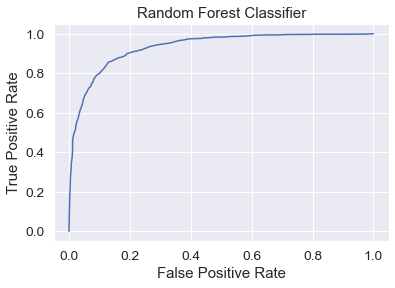

In [111]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

### MODEL DUMPING

In [105]:
import pickle
filename='bank_marketing.pkl'
pickle.dump(rf,open(filename,'wb'))

      Actual  Predict
5248       1        1
284        1        0
9696       0        0
3609       1        1
8454       0        0
...      ...      ...
4100       1        1
2410       1        1
4104       1        0
3342       1        1
5931       0        0

[3404 rows x 2 columns]


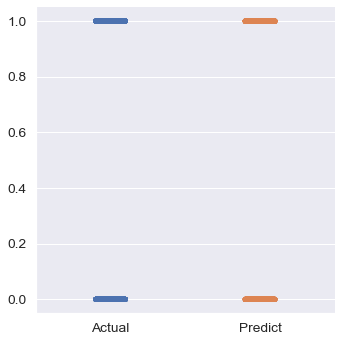

In [108]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rf.predict(x_test)
print(res)
sns.catplot(data=res)